/tmp/ipykernel_60234/3666125157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtré['period'] = df_filtré['period'].astype(str).str[:7]


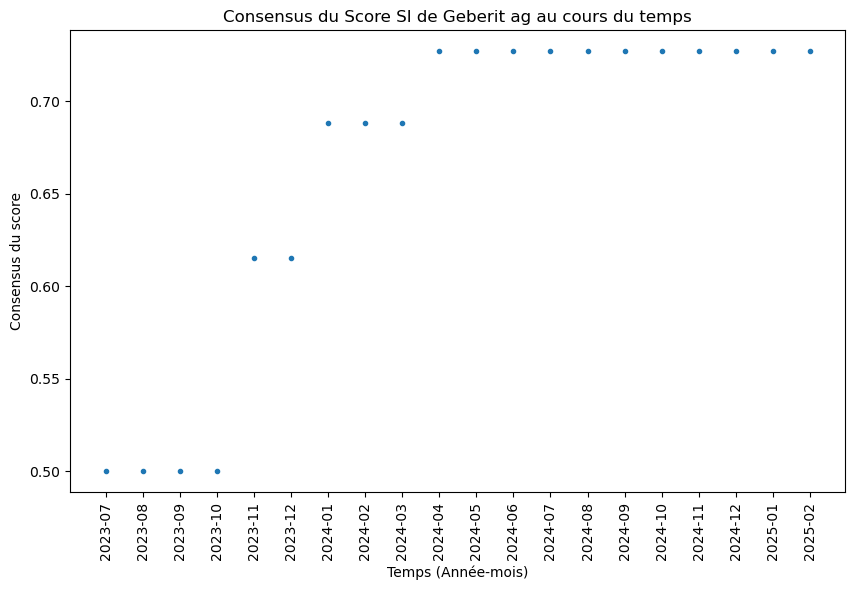

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def graphique_score(type_score, nom_entreprise):
    df = pd.read_csv('ValueCo data extract - ENSAE research project.csv')
    df_filtré = df[(df['score_kind'] == type_score) & (df['name'] == nom_entreprise)]
    
    # On traite la colonne 'period' pour ne conserver que l'année et le mois
    df_filtré['period'] = df_filtré['period'].astype(str).str[:7]
    
    # On tri des données par période
    df_sorted = df_filtré.sort_values(by='period', ascending=True)
    
    # On crée le graphique
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sorted['period'], df_sorted['consensus'], marker='.')
    
    # On définie le titre avec le type de score et le nom de l'entreprise
    plt.title(f'Consensus du Score {type_score} de {nom_entreprise} au cours du temps')
    
    # On effectue une rotation des valeurs de l'axe des x pour une meilleure lisibilité
    plt.xticks(rotation=90)
    
    # On étiquette les axes
    plt.xlabel('Temps (Année-mois)')
    plt.ylabel('Consensus du score')

    # On sauvegarde le graphique dans un fichier PNG
    plt.savefig(f'./Graphiques/Consensus du Score {type_score} de {nom_entreprise} au cours du temps.png')

    # On affiche le graphique
    plt.show()

graphique_score('SI','Geberit ag')

In [10]:
# On exécute pip install openpyxl dans le terminal
import pandas as pd
import sqlite3

def création_bdd(type_score, nom_entreprise):
    df1 = pd.read_csv('ValueCo Industrials Europe coverage.csv')
    identifiant = df1[df1['name'] == nom_entreprise]['isin'].values[0]
    
    df2 = pd.read_excel('Controversy data documentation.xlsx')
    df3 = pd.read_csv('Controversies Results Feb 24 2025.csv')
    
    # On filtre par 'Pillar Tags'
    df2_filtré = df2[df2['Pillar Tags'] == type_score]
    
    # On vérifie si la colonne 'Factor Column Header' existe dans le DataFrame filtré
    if not df2_filtré.empty:
        l_colonnes = df2_filtré['Factor Column Header'].tolist()
        print("Colonnes filtrées :", l_colonnes)
    else:
        print(f"Aucune ligne trouvée pour le type de score {type_score}")
        return
    
    l_colonnes_complet = ["ISSUERID", "ISSUER_NAME", "Client_ID", "client1", "ISSUER_TICKER", "ISSUER_CUSIP", "ISSUER_SEDOL", "ISSUER_ISIN", "ISSUER_CNTRY_DOMICILE"] + l_colonnes
    
    # On filtre df3 avec les colonnes nécessaires
    df3_réduit = df3[l_colonnes_complet]
    df3_filtré1 = df3_réduit[(df3_réduit['Client_ID'] == identifiant)]
    
    print(df3_filtré1)

création_bdd('Environment', 'Rexel sa')

Colonnes filtrées : ['BIODIV_LAND_USE_MODERATE_CONTROVERSIES', 'BIODIV_LAND_USE_SEVERE_CONTROVERSIES', 'BIODIV_LAND_USE_VERY_SEVERE_CONTROVERSIES', 'CONTR_CLIMATE_CHNG_N_SEVERE', 'CONTR_CLIMATE_CHNG_N_TOTAL', 'CONTR_ENV_INVESTMENT_N_SEVERE', 'CONTR_ENV_INVESTMENT_N_TOTAL', 'CONTR_IMPACT_ECOSYSTEMS_N_SEVERE', 'CONTR_IMPACT_ECOSYSTEMS_N_TOTAL', 'CONTR_RAW_MATERIAL_N_SEVERE', 'CONTR_RAW_MATERIAL_N_TOTAL', 'CONTR_TOXIC_EMISS_WASTE_N_SEVERE', 'CONTR_TOXIC_EMISS_WASTE_N_TOTAL', 'CONTR_WATER_N_SEVERE', 'CONTR_WATER_N_TOTAL', 'E_WASTE_MODERATE_CONTROVERSIES', 'E_WASTE_SEVERE_CONTROVERSIES', 'E_WASTE_VERY_SEVERE_CONTROVERSIES', 'FINANCING_ENV_IMP_MODERATE_CONTROVERSIES', 'FINANCING_ENV_IMP_SEVERE_CONTROVERSIES', 'FINANCING_ENV_IMP_VERY_SEVERE_CONTROVERSIES', 'PACK_MAT_WASTE_MODERATE_CONTROVERSIES', 'PACK_MAT_WASTE_SEVERE_CONTROVERSIES', 'PACK_MAT_WASTE_VERY_SEVERE_CONTROVERSIES', 'RAW_MAT_SRC_MODERATE_CONTROVERSIES', 'RAW_MAT_SRC_SEVERE_CONTROVERSIES', 'RAW_MAT_SRC_VERY_SEVERE_CONTROVERSIES', '